In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [ ]:
# Borrar columnas innecesarias
# describe()
# Max, min, std
alt = pd.read_csv("alturas.csv")

In [ ]:
alt.head()
alt.drop(columns=["Unnamed: 0.1",	"Unnamed: 0"], inplace=True)

In [ ]:
alt.head()

In [ ]:
alt.describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);


In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);

plt.vlines(alt['esp'].mean()+alt['esp'].std(), 0, 600, colors="r")
plt.vlines(alt['esp'].mean()-alt['esp'].std(), 0, 600,colors="r")


plt.vlines(alt['esp'].mean()+2*alt['esp'].std(), 0, 600, colors="b")
plt.vlines(alt['esp'].mean()-2*alt['esp'].std(), 0, 600,colors="b")

plt.vlines(alt['esp'].mean()+3*alt['esp'].std(), 0, 600, colors="g")
plt.vlines(alt['esp'].mean()-3*alt['esp'].std(), 0, 600,colors="g")

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);

c = ["r", "b", "g"]
n = [1,2,3]

for r in range(3):
    plt.vlines(alt['esp'].mean()+n[r]*alt['esp'].std(), 0, 600, colors=c[r])
    plt.vlines(alt['esp'].mean()-n[r]*alt['esp'].std(), 0, 600,colors=c[r])
    

![imagen](normal.jpg)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);
plt.hlines(alt['esp'].mean()+alt['esp'].std(), 0, 10000, colors="r")
plt.hlines(alt['esp'].mean()-alt['esp'].std(), 0, 10000,colors="r")

plt.hlines(alt['esp'].mean()+2*alt['esp'].std(), 0, 10000, colors="purple")
plt.hlines(alt['esp'].mean()-2*alt['esp'].std(), 0, 10000,colors="purple")

plt.hlines(alt['esp'].mean()+3*alt['esp'].std(), 0, 10000, colors="g")
plt.hlines(alt['esp'].mean()-3*alt['esp'].std(), 0, 10000,colors="g")

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

c = ["r", "b", "g"]
n = [1,2,3]

for r in range(3):
    plt.hlines(alt['esp'].mean()+n[r]*alt['esp'].std(), 0, 10000, colors=c[r])
    plt.hlines(alt['esp'].mean()-n[r]*alt['esp'].std(), 0, 10000,colors=c[r])

In [ ]:
sns.kdeplot(alt['esp']);

In [ ]:
plt.figure(figsize=(500,200))
sns.displot(data=alt, x="esp", kde=True)

In [ ]:
sns.kdeplot(alt['esp'], shade=True);

In [ ]:
# Supongamos que en lugar de conseguir la altura de las 10.000 personas solo tenemos una muestra de 10, 30, 50, 300 personas... (muestra)
# ¿Cómo podemos estimar la media y varianza de ese grupo de 10.000 personas (población) 
# Varianza a "mano" vs .std
np.random.seed(42)
samples = []
samples_ = []
for _ in range(1000):
    muestra = alt['esp'].sample(50)
    samples.append(abs(muestra.mean() -alt['esp'].mean()))

    min_max = (muestra.max() + muestra.min())/2
    samples_.append(abs(min_max-alt['esp'].mean()))

In [ ]:
np.random.seed(42)
muestra = alt['esp'].sample(10)

In [ ]:
muestra.std()

In [ ]:
muestra.std(ddof=0)

In [ ]:
import math 
math.sqrt(sum((alt['esp'] - alt['esp'].mean())**2)/10000)

In [ ]:
math.sqrt(sum((alt['esp'] - alt['esp'].mean())**2)/9999)

In [ ]:
alt['esp'].std()

In [ ]:
alt['esp'].std(ddof=0)

In [ ]:
s = np.array(samples)
s_ = np.array(samples_)

In [ ]:
len(s_[s>s_])

In [ ]:
np.random.seed(42)
muestra = alt['esp'].sample(300)

In [ ]:
np.random.seed(42)
from scipy.stats import ttest_1samp
ttest_1samp(muestra, alt['esp'].mean())

In [ ]:
np.random.seed(1100)
from scipy.stats import ttest_1samp
ttest_1samp([216, 214, 216], alt['esp'].mean())

In [ ]:
sns.kdeplot(alt[['por', 'swe']], shade=True);

In [ ]:
sns.kdeplot(alt[['fra', 'esp']], shade=True);

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(alt['swe'], alt['por'],  equal_var=False)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(alt['esp'], alt['fra'],  equal_var=False)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

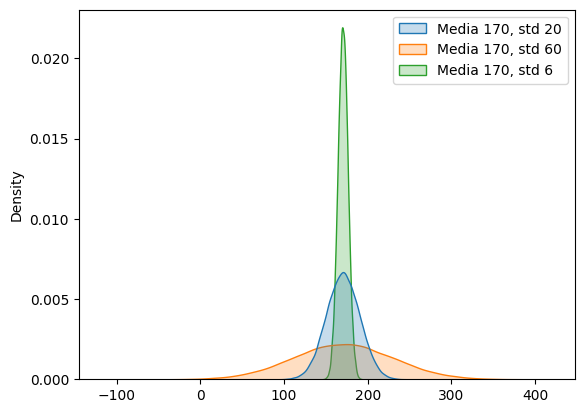

In [101]:
samples = np.random.normal(170, 20, 50000)
samples_std_60 = np.random.normal(170, 60, 50000)
samples_std_6 = np.random.normal(170, 6, 50000)
sm = pd.DataFrame()
sm['Media 170, std 20'] = samples
sm['Media 170, std 60'] = samples_std_60
sm['Media 170, std 6'] = samples_std_6
sns.kdeplot(sm, fill=True);

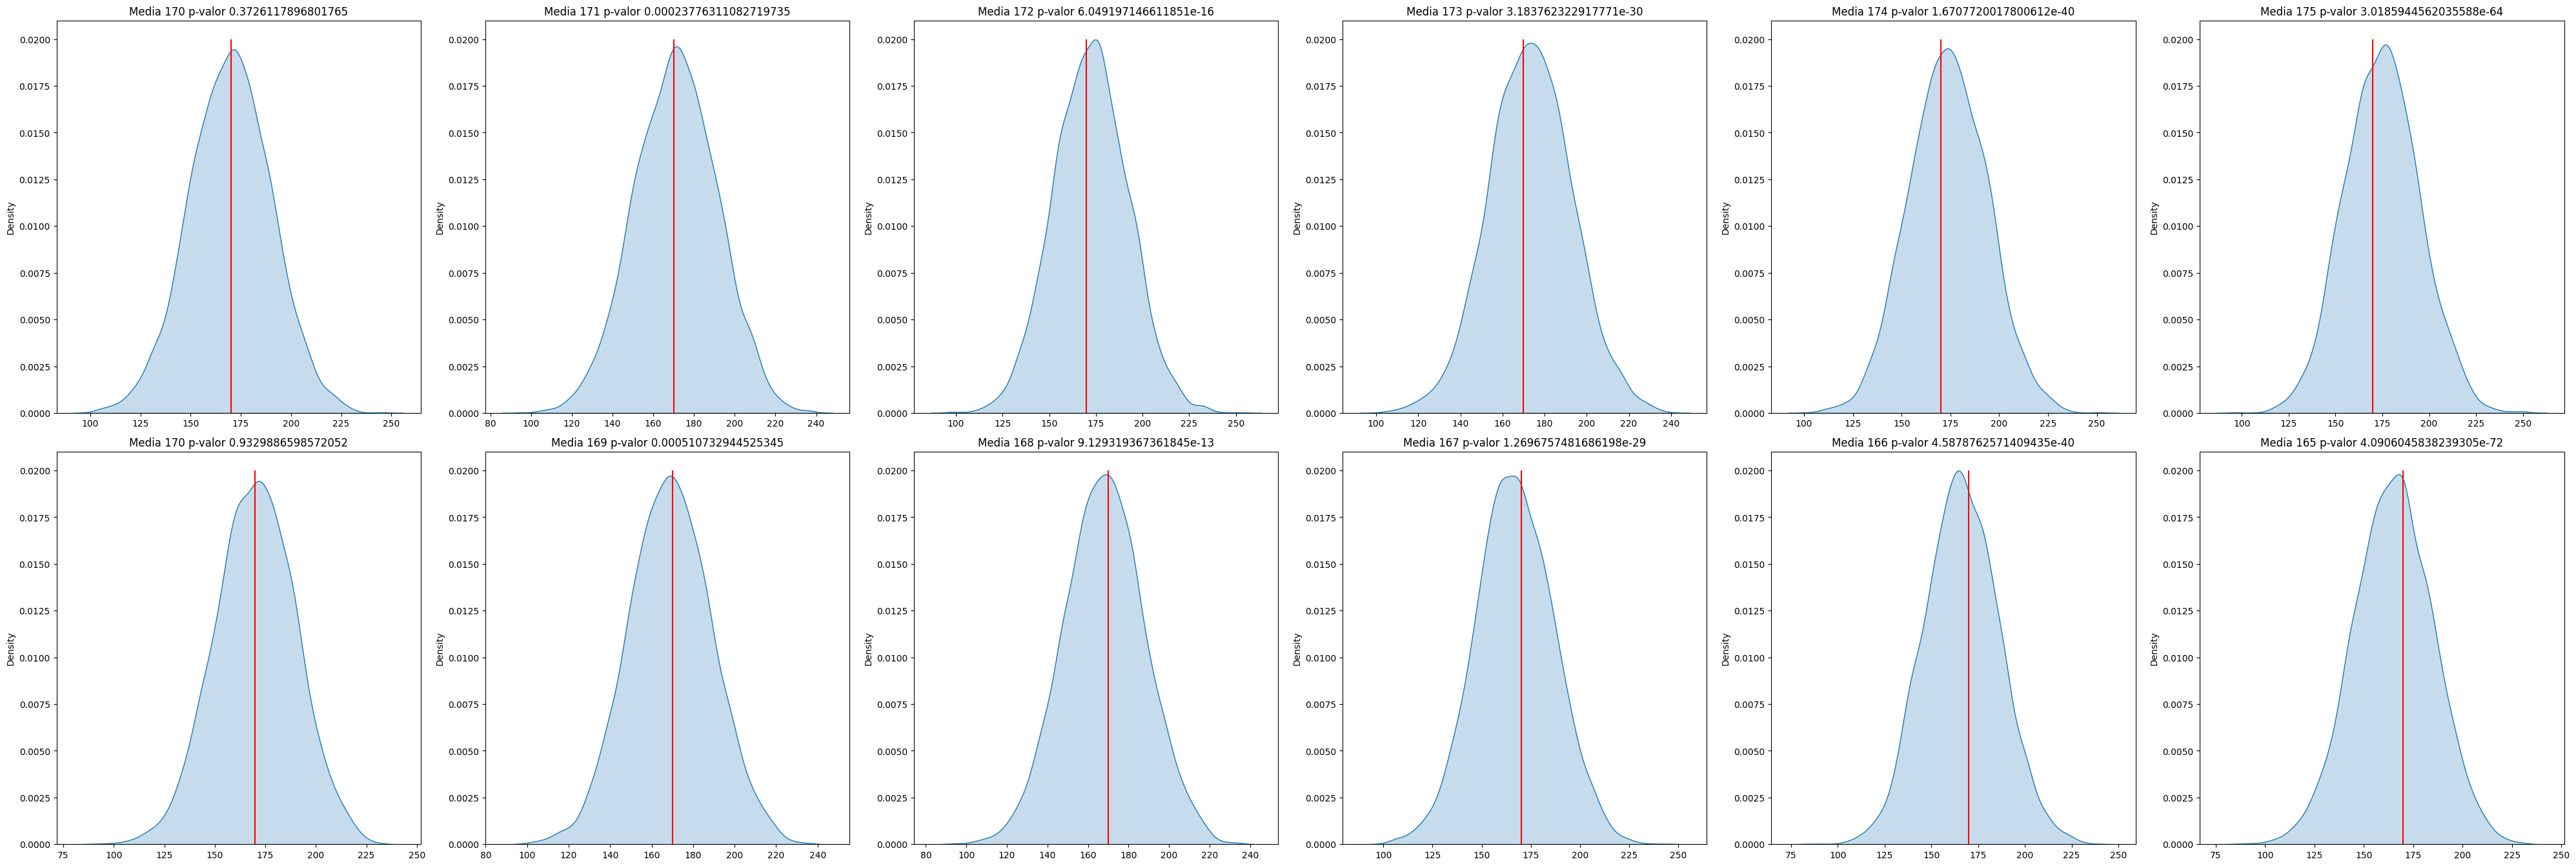

In [102]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(14)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

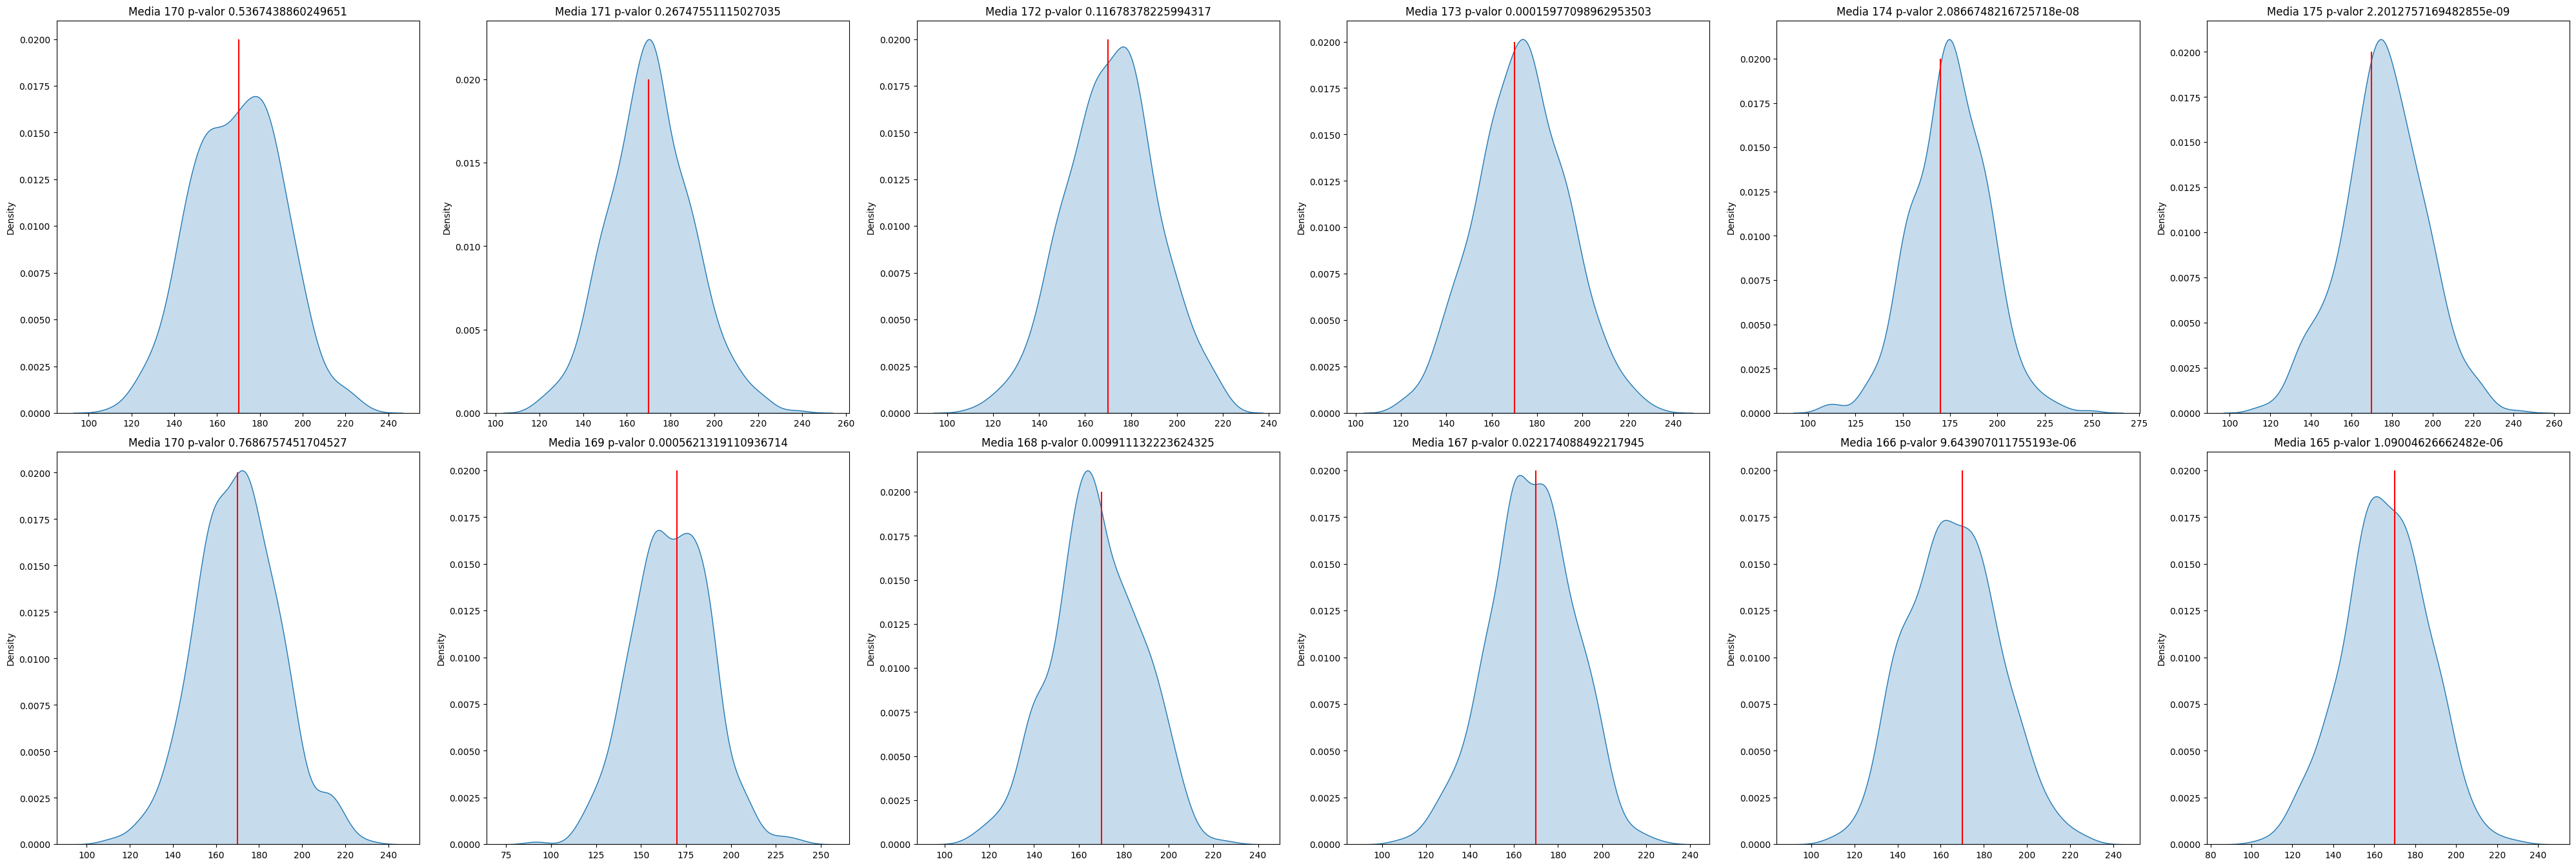

In [103]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 500)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

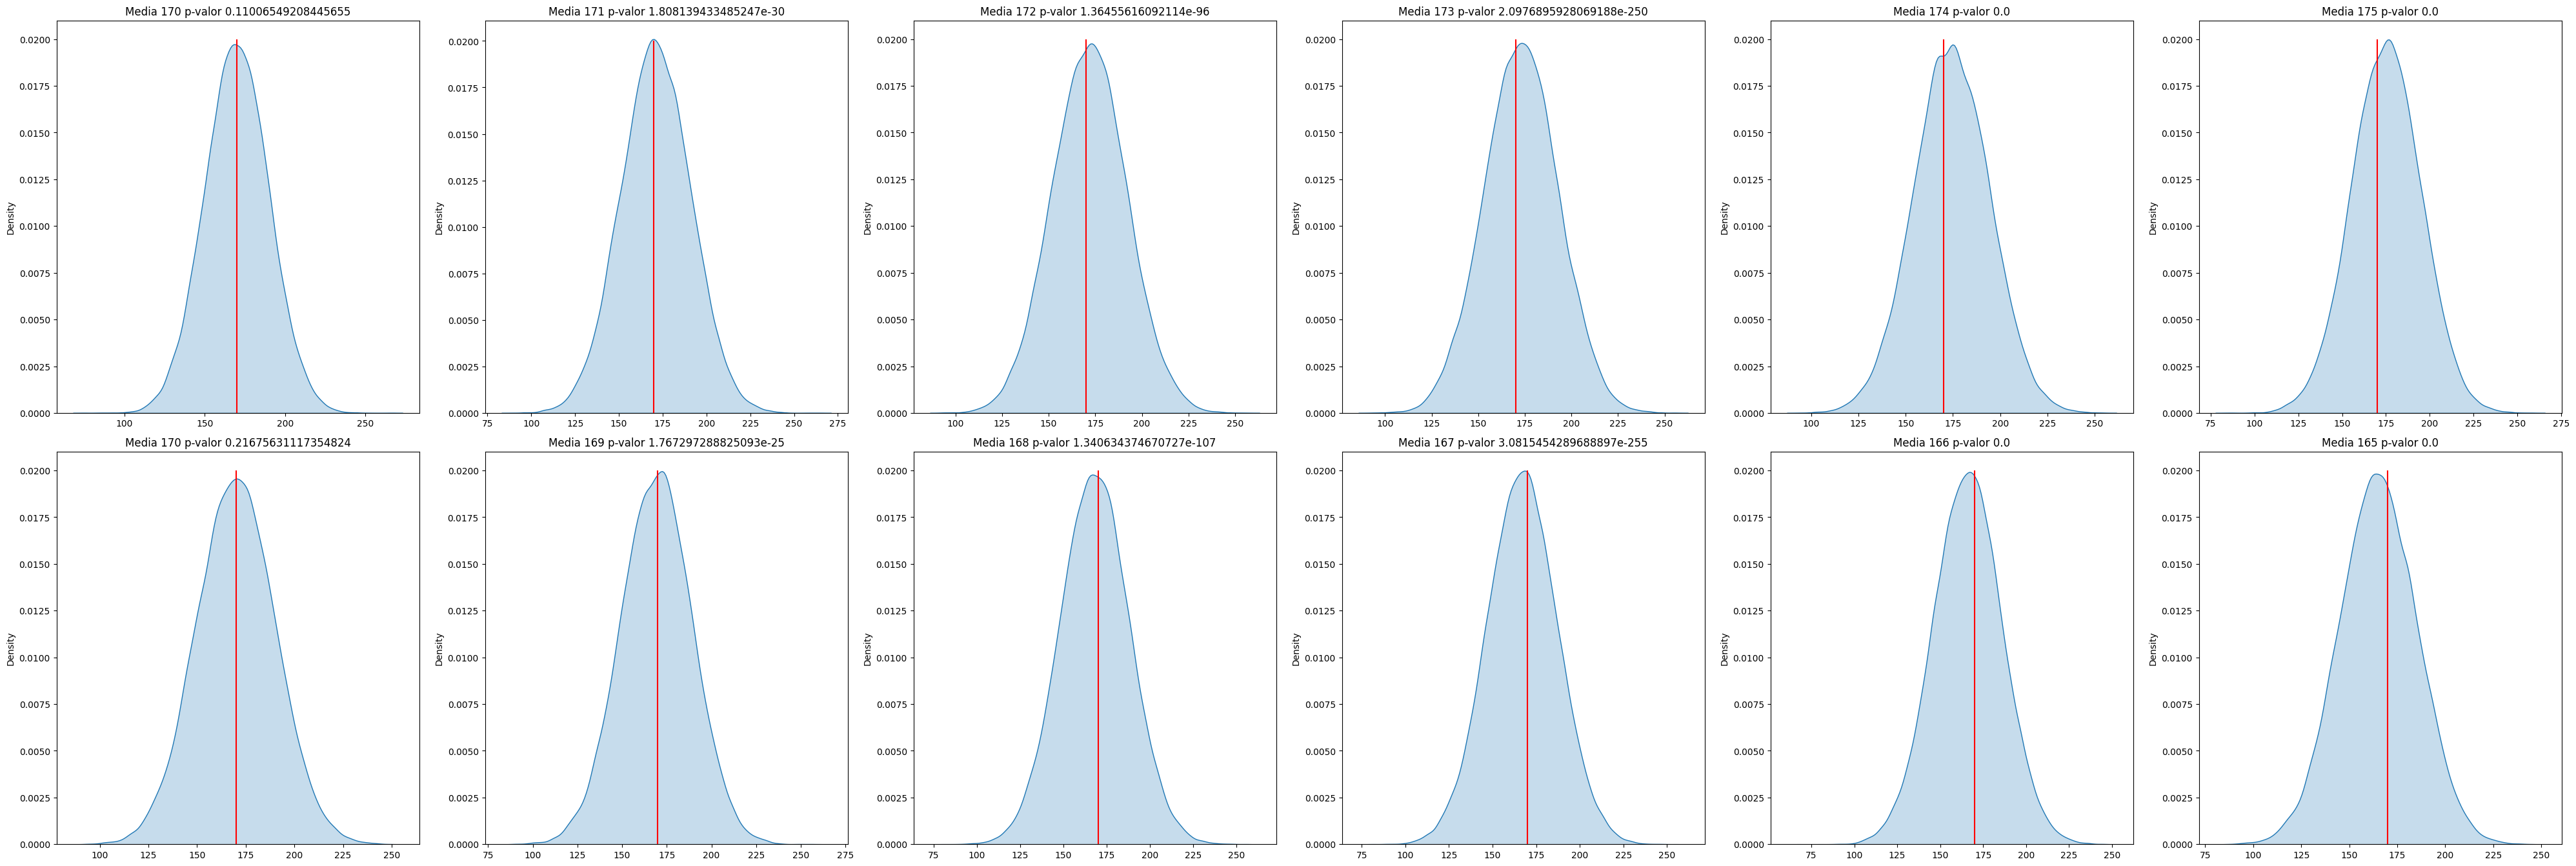

In [104]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 20, 50000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.02, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

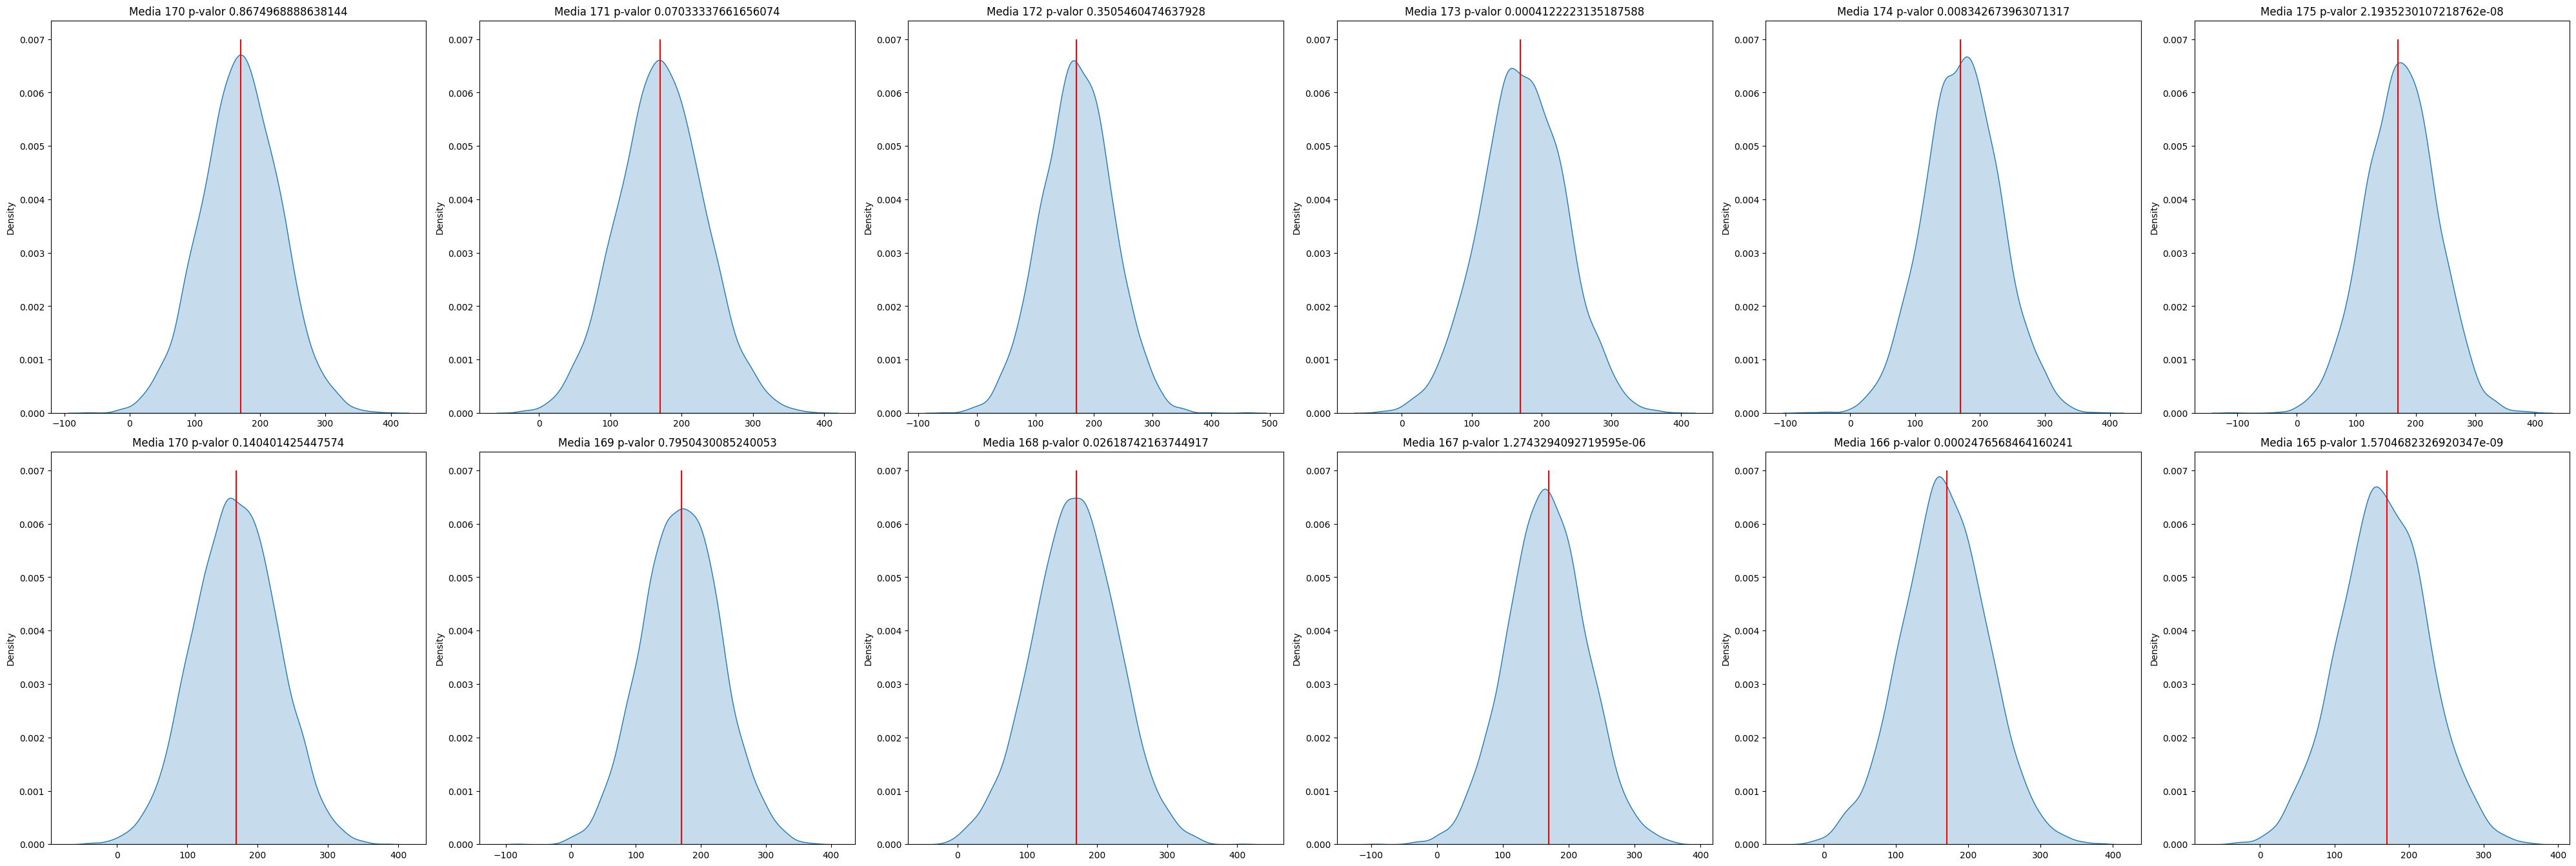

In [105]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 60, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.007, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))
    
fig.tight_layout(pad=1) # para evitar solapamientos

In [ ]:
from scipy.stats import ttest_ind,ttest_1samp
fig = plt.figure(figsize=(40, 40), dpi=100)

np.random.seed(1453)

mu = [0, 1, 2, 3,4,5,0, -1,-2,-3,-4,-5]


for i in range(1,13):
    ax = fig.add_subplot(6,6,i)
    samples = np.random.normal(170+mu[i-1], 6, 5000)
    ax = sns.kdeplot(samples, fill=True);
    ax.vlines(170, 0, 0.08, colors='r')
    tt = ttest_1samp(samples, 170)
    ax.set_title('Media '+str(170+mu[i-1]) + " p-valor "+ str(tt[1]))

    
fig.tight_layout(pad=1) # para evitar solapamientos